# ⭐️ One-Shot-SRGAN ⭐️

딥러닝 기술 중 하나인 Super-Resolution Generative Adversarial Network (SRGAN)은 2017년에 발표된 논문입니다. 이 논문은 이미지의 해상도를 높이는 기술 중 하나로서, 저해상도 이미지를 고해상도 이미지로 변환하는 것을 목표로 합니다.

SRGAN은 기존의 Super-Resolution 기술들과 달리, Generative Adversarial Network(GAN)을 활용하여 생성된 이미지의 질을 향상시키는 방법을 사용합니다. SRGAN은 먼저, 저해상도 이미지를 고해상도 이미지로 변환하는 Generator 네트워크를 구성합니다. 그 후, 생성된 고해상도 이미지가 진짜 고해상도 이미지와 구별되지 않도록 학습하는 Discriminator 네트워크를 구성합니다.

SRGAN은 기존의 Super-Resolution 기술들과 달리, 딥러닝을 통해 이미지의 세부 정보를 보다 정확하게 복원하고, 실제 이미지와 유사한 고해상도 이미지를 생성할 수 있습니다. 논문에서는 SRGAN을 활용하여 고해상도 이미지의 화질을 향상시키는 실험을 수행하였으며, 이를 통해 SRGAN이 기존의 Super-Resolution 기술들보다 뛰어난 성능을 보여준다는 것을 입증하였습니다.

SRGAN은 딥러닝 기술의 발전에 큰 기여를 하였으며, 이미지 분야에서 다양한 응용이 가능합니다. 예를 들어, 의료 이미지에서 고해상도 이미지를 생성함으로써 의사들이 보다 정확한 진단을 내릴 수 있게 되는 등의 효과가 있을 것으로 기대됩니다.

## ⭐️ Ready ⭐️

In [ ]:
! pip install GPUtil
!git clone https://github.com/ugiugi0823/SRGAN-From-Scratch.git

### ⭐️ 생성될 가짜 이미지와, 진짜 이미지가 img 폴더에 저장될 예정입니다!

그래서 img 폴더를 만들어 줘야 해요!

```
- img 
  - lr_real
  - hr_fake
  - hr_real 

```

In [35]:
%cd /content/SRGAN-From-Scratch
!mkdir img_srr
!mkdir img_srg
!mkdir model

/content/SRGAN-From-Scratch
mkdir: cannot create directory ‘model’: File exists


In [36]:
%cd /content/SRGAN-From-Scratch/img_srr
!mkdir lr_real
!mkdir hr_fake
!mkdir hr_real 

/content/SRGAN-From-Scratch/img_srr


In [37]:
%cd /content/SRGAN-From-Scratch/img_srg
!mkdir lr_real
!mkdir hr_fake
!mkdir hr_real 

/content/SRGAN-From-Scratch/img_srg


## ⭐️ srresnet 학습을 시작해볼까요? ⭐️

In [18]:
import gc
gc.collect()

20

In [24]:
import torch
torch.cuda.empty_cache() 

In [ ]:
%matplotlib inline
%cd /content/SRGAN-From-Scratch
!python train_srres.py

In [ ]:
%matplotlib inline
%cd /content/SRGAN-From-Scratch

CMD = "python train_srres.py "\
      "--epochs 1e5 "\
      "--batch_size 16 "\
      "--display_step 500 "\
      "--device cuda "\
      "--lr 1e-4 "
!{CMD}

## ⭐️ 학습된 이미지 결과를 확인해볼까요? ⭐️ 

- 학습을 100.000번 했을거예요!
- 500번씩 나누어서 이미지를 저장했어요!
- epoch 을 1 ~ 200 을 넣어주세요


/content/SRGAN-From-Scratch
====진짜 저화질 이미지====


====진짜 고화질 이미지====


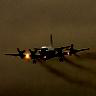

====우리가 생성한 가짜 고화질 이미지====


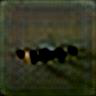

In [16]:
%cd /content/SRGAN-From-Scratch
from utils import show_images

# 요기요기요기요기
# 200번 돌렸어요!

epoch = 1

print('====진짜 저화질 이미지====')
show_images(f'./img_srr/lr_real/lr_real_{epoch*500}.jpg')
print('====진짜 고화질 이미지====')
show_images(f'./img_srr/hr_real/hr_real_{epoch*500}.jpg')
print('====우리가 생성한 가짜 고화질 이미지====')
show_images(f'./img_srr/hr_fake/hr_fake_{epoch*500}.jpg')

## ⭐️ srresnet을 활용해서 이제 SRGAN을 만들어볼거예요! ⭐️

In [ ]:
%matplotlib inline
%cd /content/SRGAN-From-Scratch

CMD = "python train_srg.py "\
      "--epochs 2e5 "\
      "--batch_size 16 "\
      "--display_step 500 "\
      "--device cuda "\
      "--lr 1e-4 "\
      "--gen_path ./model/srresnet.pt "\
      
!{CMD}

/content/SRGAN-From-Scratch
/usr/local/lib/python3.9/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=VGG19_Weights.IMAGENET1K_V1`. You can also use `weights=VGG19_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Files already downloaded and verified
100% 313/313 [00:27<00:00, 11.24it/s]
 59% 186/313 [00:16<00:11, 11.43it/s]Step 500: Generator loss: 0.02768, Discriminator loss: 0.69422
Figure(640x480)
Figure(640x480)
Figure(640x480)
| ID | GPU | MEM |
------------------
|  0 | 30% |  6% |
100% 313/313 [00:27<00:00, 11.42it/s]
100% 313/313 [00:27<00:00, 11.57it/s]


## ⭐️ 학습된 이미지 결과를 확인해볼까요? ⭐️ 

- 학습을 200.000번 했을거예요!
- 500번씩 나누어서 이미지를 저장했어요!
- epoch 을 1 ~ 400 을 넣어주세요


/content/SRGAN-From-Scratch
====진짜 저화질 이미지====


====진짜 고화질 이미지====


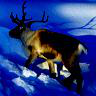

====우리가 생성한 가짜 고화질 이미지====


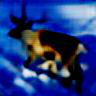

In [52]:
%cd /content/SRGAN-From-Scratch
from utils import show_images

# 요기요기요기요기
# 400번 돌렸어요!

epoch = 1

print('====진짜 저화질 이미지====')
show_images(f'./img_srg/lr_real/lr_real_{epoch*500}.jpg')
print('====진짜 고화질 이미지====')
show_images(f'./img_srg/hr_real/hr_real_{epoch*500}.jpg')
print('====우리가 생성한 가짜 고화질 이미지====')
show_images(f'./img_srg/hr_fake/hr_fake_{epoch*500}.jpg')